In [2]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import torch_geometric.data as Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as pl


# Step 1: Create a custom dataset of graphs
adj_matrices = [
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
] 
 # List of adjacency matrices for each graph
feat_matrices = [
  [20, 50, 10],
  [65, 15, 75],
  [75, 35, 60],
  [95, 20, 75],
  [45, 85, 60],
  [40, 10, 85],
  [65, 45, 20],
  [55, 35, 20],
  [90, 70, 5],
  [55, 25, 15],
  [40, 60, 75],
  [10, 35, 0],
  [65, 85, 10],
  [15, 35, 75],
  [80, 20, 35],
  [35, 75, 95],
  [70, 90, 15],
  [85, 65, 35],
  [15, 75, 5],
  [30, 5, 85],
  [70, 35, 85],
  [40, 15, 70],
  [25, 10, 35],
  [85, 5, 60],

]

adj_matrices = [torch.tensor(adj) for adj in adj_matrices]
feat_matrices = [torch.tensor(feat) for feat in feat_matrices]

dataset = []
for adj, feat in zip(adj_matrices, feat_matrices):
    x = feat.float()
    edge_index = adj.nonzero(as_tuple=False).t()
    data = Data.Data(x=x, edge_index=edge_index)
    dataset.append(data)

# Step 2: Split the dataset into training and test sets
num_graphs = len(dataset)
num_train = int(0.8 * num_graphs)
train_dataset = dataset[:num_train]
test_dataset = dataset[num_train:]

# Step 3: Define the graph autoencoder model
input_dim = feat_matrices[0].shape[1]
hidden_dim = 64
latent_dim = 32

class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, learning_rate):
        super(GraphAutoencoder, self).__init__()
        self.num_layers = num_layers

        self.layers = nn.ModuleList()
        self.layers.append(GCNConv(input_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.layers.append(GCNConv(hidden_dim, hidden_dim))
        self.layers.append(GCNConv(hidden_dim, latent_dim))

        self.fc_hidden = nn.Linear(latent_dim, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, input_dim)

        self.learning_rate = learning_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for layer in self.layers:
            x = layer(x, edge_index)
            x = torch.relu(x)

        x = self.fc_hidden(x)
        x = torch.relu(x)
        optimized_features = self.fc_output(x)
        return optimized_features

# Step 4: Train the graph autoencoder
num_layers = 20
learning_rate = 0.001
num_epochs = 10

model = GraphAutoencoder(input_dim, hidden_dim, latent_dim, num_layers, learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0
    for data in train_dataset:
        optimizer.zero_grad()
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataset)

    test_loss = 0
    for data in test_dataset:
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        test_loss += loss.item()
    test_loss /= len(test_dataset)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Create an empty DataFrame to store all the features
all_features_df = pd.DataFrame()

# Output the optimized node features for each input matrix
for i, data in enumerate(dataset):
    optimized_features = model(data)
    print(f"Optimized Node Features for Input Graph {i + 1}:")
    print(optimized_features)

    # Convert optimized features to NumPy array
    optimized_features_np = optimized_features.detach().numpy()

    # Create a DataFrame from the NumPy array
    feat_df = pd.DataFrame(optimized_features_np)
    
    # Convert column names to strings and add a prefix indicating the graph index
    col_names = [f"LUT", f"DSP", f"FF"]
    feat_df.columns = col_names
    
    # Add a row to separate the matrices
    separator_row = pd.DataFrame(["---"] * len(col_names)).T
    separator_row.columns = col_names
    
    # Append the DataFrame to the existing features DataFrame
    all_features_df = pd.concat([all_features_df, feat_df, separator_row], ignore_index=True)

# Save the DataFrame to an Excel file
all_features_df.to_excel('optimized_features.xlsx', index=False)

    
# Save the losses to an Excel file
data = {'Epoch': epochs, 'Train Loss': train_losses, 'Test Loss': test_losses}
df = pd.DataFrame(data)
df.to_excel('losses.xlsx', index=False)
    
# Plot the training and test losses
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, 'o-', label='Train Loss')
plt.plot(epochs, test_losses, 'o-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




IndexError: tuple index out of range

Epoch 1/100, Train Loss: 187.8442, Test Loss: 58.7506
Epoch 2/100, Train Loss: 104.8750, Test Loss: 119.4483
Epoch 3/100, Train Loss: 93.3364, Test Loss: 76.1515
Epoch 4/100, Train Loss: 104.2694, Test Loss: 116.9638
Epoch 5/100, Train Loss: 127.4708, Test Loss: 84.4501
Epoch 6/100, Train Loss: 65.5774, Test Loss: 60.1402
Epoch 7/100, Train Loss: 66.5808, Test Loss: 65.4689
Epoch 8/100, Train Loss: 57.9842, Test Loss: 57.3369
Epoch 9/100, Train Loss: 64.9871, Test Loss: 67.6631
Epoch 10/100, Train Loss: 59.1893, Test Loss: 61.8581
Epoch 11/100, Train Loss: 72.3993, Test Loss: 83.9611
Epoch 12/100, Train Loss: 71.7349, Test Loss: 74.4479
Epoch 13/100, Train Loss: 90.1787, Test Loss: 111.7137
Epoch 14/100, Train Loss: 117.4962, Test Loss: 73.1576
Epoch 15/100, Train Loss: 61.9004, Test Loss: 65.0080
Epoch 16/100, Train Loss: 69.4349, Test Loss: 80.1602
Epoch 17/100, Train Loss: 70.6573, Test Loss: 65.4813
Epoch 18/100, Train Loss: 81.5648, Test Loss: 94.1314
Epoch 19/100, Train Loss: 94.

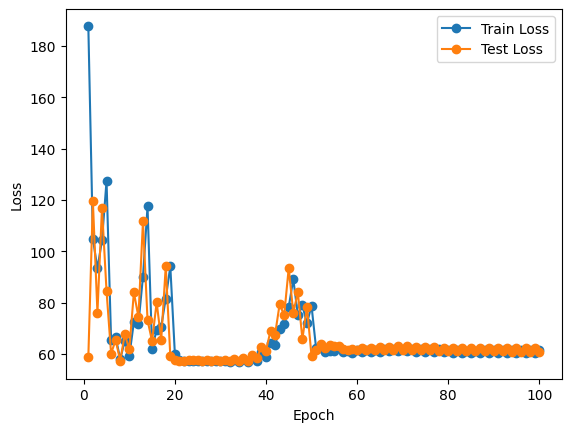

In [2]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import torch_geometric.data as Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import numpy as np


# Step 1: Create a custom dataset of graphs
adj_matrices = [
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 0],
     [1, 0, 0, 1],
     [1, 0, 0, 1],
     [0, 1, 1, 0]],
    [[1, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]]
    
]  # List of adjacency matrices for each graph
feat_matrices = [
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]],
    [[2, 4, 6],
     [8, 10, 12],
     [14, 16, 18],
     [20, 22, 24]],
    [[3, 6, 9],
     [12, 15, 18],
     [21, 24, 27],
     [30, 33, 36]],
    [[2, 4, 6],
     [18, 10, 12],
     [14, 16, 18],
     [20, 22, 4]],
    [[12, 4, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 0, 24]],
    [[1, 2, 2],
     [3, 3, 3],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [2, 4, 6],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [8, 10, 12],
     [1, 2, 3],
     [20, 22, 24]],
    [[2, 4, 6],
     [1, 1, 1],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 3, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 2, 24]]
    
]  # List of node feature matrices for each graph

adj_matrices = [torch.tensor(adj) for adj in adj_matrices]
feat_matrices = [torch.tensor(feat) for feat in feat_matrices]

dataset = []
for adj, feat in zip(adj_matrices, feat_matrices):
    x = feat.float()
    edge_index = adj.nonzero(as_tuple=False).t()
    data = Data.Data(x=x, edge_index=edge_index)
    dataset.append(data)

# Step 2: Split the dataset into training and test sets
num_graphs = len(dataset)
num_train = int(0.8 * num_graphs)
train_dataset = dataset[:num_train]
test_dataset = dataset[num_train:]

# Step 3: Define the graph autoencoder model
input_dim = feat_matrices[0].shape[1]
hidden_dim = 64
latent_dim = 32

class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, learning_rate):
        super(GraphAutoencoder, self).__init__()
        self.num_layers = num_layers

        self.layers = nn.ModuleList()
        self.layers.append(GCNConv(input_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.layers.append(GCNConv(hidden_dim, hidden_dim))
        self.layers.append(GCNConv(hidden_dim, latent_dim))

        self.fc_hidden = nn.Linear(latent_dim, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, input_dim)

        self.learning_rate = learning_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for layer in self.layers:
            x = layer(x, edge_index)
            x = torch.relu(x)

        x = self.fc_hidden(x)
        x = torch.relu(x)
        optimized_features = self.fc_output(x)
        return optimized_features

# Step 4: Train the graph autoencoder
num_layers = 4
learning_rate = 0.01
num_epochs = 100

model = GraphAutoencoder(input_dim, hidden_dim, latent_dim, num_layers, learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0
    for data in train_dataset:
        optimizer.zero_grad()
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataset)

    test_loss = 0
    for data in test_dataset:
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        test_loss += loss.item()
    test_loss /= len(test_dataset)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Create an empty DataFrame to store all the features
all_features_df = pd.DataFrame()

# Output the optimized node features for each input matrix
for i, data in enumerate(dataset):
    optimized_features = model(data)
    print(f"Optimized Node Features for Input Graph {i + 1}:")
    print(optimized_features)

    # Convert optimized features to NumPy array
    optimized_features_np = optimized_features.detach().numpy()

    # Create a DataFrame from the NumPy array
    feat_df = pd.DataFrame(optimized_features_np)
    
    # Convert column names to strings and add a prefix indicating the graph index
    col_names = [f"LUT", f"DSP", f"FF"]
    feat_df.columns = col_names
    
    # Add a row to separate the matrices
    separator_row = pd.DataFrame(["---"] * len(col_names)).T
    separator_row.columns = col_names
    
    # Append the DataFrame to the existing features DataFrame
    all_features_df = pd.concat([all_features_df, feat_df, separator_row], ignore_index=True)

# Save the DataFrame to an Excel file
all_features_df.to_excel('optimized_features_2.xlsx', index=False)

    
# Save the losses to an Excel file
data = {'Epoch': epoch, 'Train Loss': train_losses, 'Test Loss': test_losses}
df = pd.DataFrame(data)
df.to_excel('losses_2.xlsx', index=False)
    
# Plot the training and test losses
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, 'o-', label='Train Loss')
plt.plot(epochs, test_losses, 'o-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100, Train Loss: 613235564742952.8750, Test Loss: 764291968.0000
Epoch 2/100, Train Loss: 304603572.7585, Test Loss: 74583.8320
Epoch 3/100, Train Loss: 3376536.7339, Test Loss: 2379577.1250
Epoch 4/100, Train Loss: 297640.2392, Test Loss: 252.9329
Epoch 5/100, Train Loss: 7246.8497, Test Loss: 68.6292
Epoch 6/100, Train Loss: 246.3532, Test Loss: 238.2817
Epoch 7/100, Train Loss: 175.8554, Test Loss: 131.8624
Epoch 8/100, Train Loss: 148.3687, Test Loss: 115.1277
Epoch 9/100, Train Loss: 114.4522, Test Loss: 83.0589
Epoch 10/100, Train Loss: 81.5958, Test Loss: 79.1957
Epoch 11/100, Train Loss: 73.6361, Test Loss: 70.2735
Epoch 12/100, Train Loss: 69.9222, Test Loss: 63.7016
Epoch 13/100, Train Loss: 70.1882, Test Loss: 62.8079
Epoch 14/100, Train Loss: 70.2593, Test Loss: 63.4332
Epoch 15/100, Train Loss: 69.7797, Test Loss: 64.5732
Epoch 16/100, Train Loss: 69.5760, Test Loss: 65.1841
Epoch 17/100, Train Loss: 69.5286, Test Loss: 65.1336
Epoch 18/100, Train Loss: 69.5232, Te

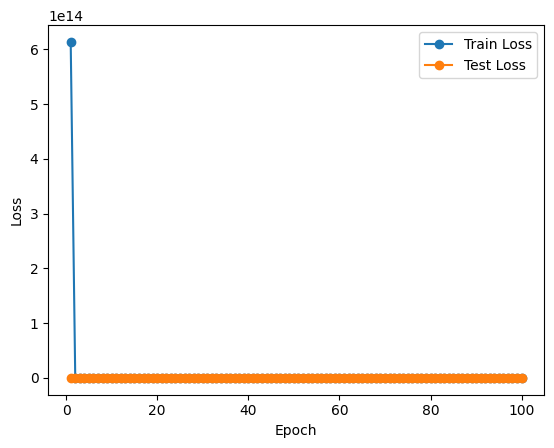

In [3]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import torch_geometric.data as Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import numpy as np


# Step 1: Create a custom dataset of graphs
adj_matrices = [
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 0],
     [1, 0, 0, 1],
     [1, 0, 0, 1],
     [0, 1, 1, 0]],
    [[1, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]]
    
]  # List of adjacency matrices for each graph
feat_matrices = [
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]],
    [[2, 4, 6],
     [8, 10, 12],
     [14, 16, 18],
     [20, 22, 24]],
    [[3, 6, 9],
     [12, 15, 18],
     [21, 24, 27],
     [30, 33, 36]],
    [[2, 4, 6],
     [18, 10, 12],
     [14, 16, 18],
     [20, 22, 4]],
    [[12, 4, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 0, 24]],
    [[1, 2, 2],
     [3, 3, 3],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [2, 4, 6],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [8, 10, 12],
     [1, 2, 3],
     [20, 22, 24]],
    [[2, 4, 6],
     [1, 1, 1],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 3, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 2, 24]]
    
]  # List of node feature matrices for each graph

adj_matrices = [torch.tensor(adj) for adj in adj_matrices]
feat_matrices = [torch.tensor(feat) for feat in feat_matrices]

dataset = []
for adj, feat in zip(adj_matrices, feat_matrices):
    x = feat.float()
    edge_index = adj.nonzero(as_tuple=False).t()
    data = Data.Data(x=x, edge_index=edge_index)
    dataset.append(data)

# Step 2: Split the dataset into training and test sets
num_graphs = len(dataset)
num_train = int(0.8 * num_graphs)
train_dataset = dataset[:num_train]
test_dataset = dataset[num_train:]

# Step 3: Define the graph autoencoder model
input_dim = feat_matrices[0].shape[1]
hidden_dim = 64
latent_dim = 32

class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, learning_rate):
        super(GraphAutoencoder, self).__init__()
        self.num_layers = num_layers

        self.layers = nn.ModuleList()
        self.layers.append(GCNConv(input_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.layers.append(GCNConv(hidden_dim, hidden_dim))
        self.layers.append(GCNConv(hidden_dim, latent_dim))

        self.fc_hidden = nn.Linear(latent_dim, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, input_dim)

        self.learning_rate = learning_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for layer in self.layers:
            x = layer(x, edge_index)
            x = torch.relu(x)

        x = self.fc_hidden(x)
        x = torch.relu(x)
        optimized_features = self.fc_output(x)
        return optimized_features

# Step 4: Train the graph autoencoder
num_layers = 25
learning_rate = 0.1
num_epochs = 100

model = GraphAutoencoder(input_dim, hidden_dim, latent_dim, num_layers, learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0
    for data in train_dataset:
        optimizer.zero_grad()
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataset)

    test_loss = 0
    for data in test_dataset:
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        test_loss += loss.item()
    test_loss /= len(test_dataset)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Create an empty DataFrame to store all the features
all_features_df = pd.DataFrame()

# Output the optimized node features for each input matrix
for i, data in enumerate(dataset):
    optimized_features = model(data)
    print(f"Optimized Node Features for Input Graph {i + 1}:")
    print(optimized_features)

    # Convert optimized features to NumPy array
    optimized_features_np = optimized_features.detach().numpy()

    # Create a DataFrame from the NumPy array
    feat_df = pd.DataFrame(optimized_features_np)
    
    # Convert column names to strings and add a prefix indicating the graph index
    col_names = [f"LUT", f"DSP", f"FF"]
    feat_df.columns = col_names
    
    # Add a row to separate the matrices
    separator_row = pd.DataFrame(["---"] * len(col_names)).T
    separator_row.columns = col_names
    
    # Append the DataFrame to the existing features DataFrame
    all_features_df = pd.concat([all_features_df, feat_df, separator_row], ignore_index=True)

# Save the DataFrame to an Excel file
all_features_df.to_excel('optimized_features_3.xlsx', index=False)

    
# Save the losses to an Excel file
data = {'Epoch': epoch, 'Train Loss': train_losses, 'Test Loss': test_losses}
df = pd.DataFrame(data)
df.to_excel('losses_3.xlsx', index=False)
    
# Plot the training and test losses
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, 'o-', label='Train Loss')
plt.plot(epochs, test_losses, 'o-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100, Train Loss: 158.3419, Test Loss: 150.5753
Epoch 2/100, Train Loss: 171.8549, Test Loss: 88.0090
Epoch 3/100, Train Loss: 166.6617, Test Loss: 156.7697
Epoch 4/100, Train Loss: 161.0874, Test Loss: 62.9353
Epoch 5/100, Train Loss: 81.0142, Test Loss: 80.0780
Epoch 6/100, Train Loss: 72.7287, Test Loss: 60.1090
Epoch 7/100, Train Loss: 72.2974, Test Loss: 62.3812
Epoch 8/100, Train Loss: 62.5271, Test Loss: 59.3899
Epoch 9/100, Train Loss: 58.6715, Test Loss: 58.1546
Epoch 10/100, Train Loss: 59.1289, Test Loss: 57.7866
Epoch 11/100, Train Loss: 60.5653, Test Loss: 58.2343
Epoch 12/100, Train Loss: 60.1385, Test Loss: 58.5595
Epoch 13/100, Train Loss: 59.1145, Test Loss: 58.1891
Epoch 14/100, Train Loss: 58.5155, Test Loss: 57.8364
Epoch 15/100, Train Loss: 58.2988, Test Loss: 57.6739
Epoch 16/100, Train Loss: 58.3087, Test Loss: 57.6889
Epoch 17/100, Train Loss: 58.3710, Test Loss: 57.7458
Epoch 18/100, Train Loss: 58.4397, Test Loss: 57.7239
Epoch 19/100, Train Loss: 58.52

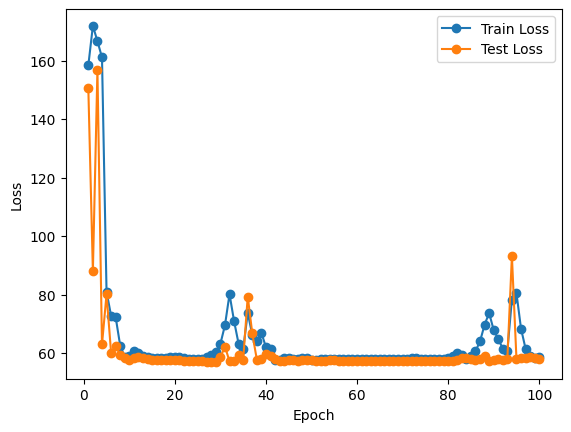

In [4]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import torch_geometric.data as Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import numpy as np


# Step 1: Create a custom dataset of graphs
adj_matrices = [
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 0],
     [1, 0, 0, 1],
     [1, 0, 0, 1],
     [0, 1, 1, 0]],
    [[1, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]]
    
]  # List of adjacency matrices for each graph
feat_matrices = [
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]],
    [[2, 4, 6],
     [8, 10, 12],
     [14, 16, 18],
     [20, 22, 24]],
    [[3, 6, 9],
     [12, 15, 18],
     [21, 24, 27],
     [30, 33, 36]],
    [[2, 4, 6],
     [18, 10, 12],
     [14, 16, 18],
     [20, 22, 4]],
    [[12, 4, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 0, 24]],
    [[1, 2, 2],
     [3, 3, 3],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [2, 4, 6],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [8, 10, 12],
     [1, 2, 3],
     [20, 22, 24]],
    [[2, 4, 6],
     [1, 1, 1],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 3, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 2, 24]]
    
]  # List of node feature matrices for each graph

adj_matrices = [torch.tensor(adj) for adj in adj_matrices]
feat_matrices = [torch.tensor(feat) for feat in feat_matrices]

dataset = []
for adj, feat in zip(adj_matrices, feat_matrices):
    x = feat.float()
    edge_index = adj.nonzero(as_tuple=False).t()
    data = Data.Data(x=x, edge_index=edge_index)
    dataset.append(data)

# Step 2: Split the dataset into training and test sets
num_graphs = len(dataset)
num_train = int(0.8 * num_graphs)
train_dataset = dataset[:num_train]
test_dataset = dataset[num_train:]

# Step 3: Define the graph autoencoder model
input_dim = feat_matrices[0].shape[1]
hidden_dim = 64
latent_dim = 32

class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, learning_rate):
        super(GraphAutoencoder, self).__init__()
        self.num_layers = num_layers

        self.layers = nn.ModuleList()
        self.layers.append(GCNConv(input_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.layers.append(GCNConv(hidden_dim, hidden_dim))
        self.layers.append(GCNConv(hidden_dim, latent_dim))

        self.fc_hidden = nn.Linear(latent_dim, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, input_dim)

        self.learning_rate = learning_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for layer in self.layers:
            x = layer(x, edge_index)
            x = torch.relu(x)

        x = self.fc_hidden(x)
        x = torch.relu(x)
        optimized_features = self.fc_output(x)
        return optimized_features

# Step 4: Train the graph autoencoder
num_layers = 12
learning_rate = 0.01
num_epochs = 100

model = GraphAutoencoder(input_dim, hidden_dim, latent_dim, num_layers, learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0
    for data in train_dataset:
        optimizer.zero_grad()
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataset)

    test_loss = 0
    for data in test_dataset:
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        test_loss += loss.item()
    test_loss /= len(test_dataset)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Create an empty DataFrame to store all the features
all_features_df = pd.DataFrame()

# Output the optimized node features for each input matrix
for i, data in enumerate(dataset):
    optimized_features = model(data)
    print(f"Optimized Node Features for Input Graph {i + 1}:")
    print(optimized_features)

    # Convert optimized features to NumPy array
    optimized_features_np = optimized_features.detach().numpy()

    # Create a DataFrame from the NumPy array
    feat_df = pd.DataFrame(optimized_features_np)
    
    # Convert column names to strings and add a prefix indicating the graph index
    col_names = [f"LUT", f"DSP", f"FF"]
    feat_df.columns = col_names
    
    # Add a row to separate the matrices
    separator_row = pd.DataFrame(["---"] * len(col_names)).T
    separator_row.columns = col_names
    
    # Append the DataFrame to the existing features DataFrame
    all_features_df = pd.concat([all_features_df, feat_df, separator_row], ignore_index=True)

# Save the DataFrame to an Excel file
all_features_df.to_excel('optimized_features_4.xlsx', index=False)

    
# Save the losses to an Excel file
data = {'Epoch': epoch, 'Train Loss': train_losses, 'Test Loss': test_losses}
df = pd.DataFrame(data)
df.to_excel('losses_4.xlsx', index=False)
    
# Plot the training and test losses
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, 'o-', label='Train Loss')
plt.plot(epochs, test_losses, 'o-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100, Train Loss: 143.8172, Test Loss: 57.1164
Epoch 2/100, Train Loss: 92.4063, Test Loss: 83.9979
Epoch 3/100, Train Loss: 86.7832, Test Loss: 78.0855
Epoch 4/100, Train Loss: 57.4597, Test Loss: 55.0123
Epoch 5/100, Train Loss: 65.4318, Test Loss: 60.2498
Epoch 6/100, Train Loss: 56.8616, Test Loss: 58.2195
Epoch 7/100, Train Loss: 51.3110, Test Loss: 52.7861
Epoch 8/100, Train Loss: 54.8710, Test Loss: 58.2377
Epoch 9/100, Train Loss: 52.4835, Test Loss: 54.7595
Epoch 10/100, Train Loss: 52.0079, Test Loss: 54.2563
Epoch 11/100, Train Loss: 51.9525, Test Loss: 55.4635
Epoch 12/100, Train Loss: 51.3186, Test Loss: 54.0387
Epoch 13/100, Train Loss: 51.9972, Test Loss: 55.5201
Epoch 14/100, Train Loss: 51.1713, Test Loss: 53.9483
Epoch 15/100, Train Loss: 51.9169, Test Loss: 55.4732
Epoch 16/100, Train Loss: 51.0096, Test Loss: 53.7176
Epoch 17/100, Train Loss: 52.0684, Test Loss: 56.1068
Epoch 18/100, Train Loss: 50.8044, Test Loss: 53.3862
Epoch 19/100, Train Loss: 52.7295, T

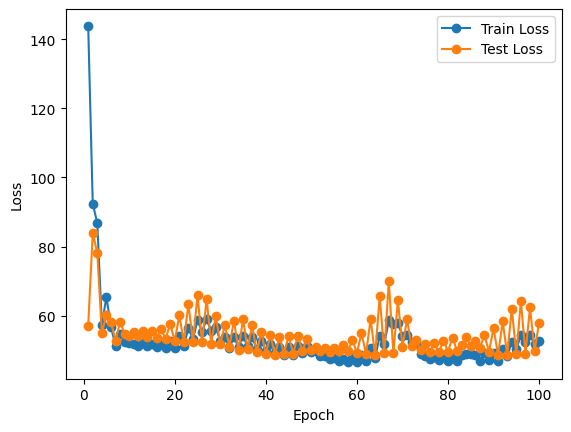

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import torch_geometric.data as Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import numpy as np


# Step 1: Create a custom dataset of graphs
adj_matrices = [
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 0],
     [1, 0, 0, 1],
     [1, 0, 0, 1],
     [0, 1, 1, 0]],
    [[1, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [0, 0, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 0],
     [1, 1, 0, 1],
     [0, 1, 1, 0]],
    [[0, 1, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1],
     [1, 0, 1, 0]],
    [[0, 1, 1, 1],
     [1, 0, 1, 0],
     [0, 1, 0, 1],
     [0, 1, 1, 0]]
    
]  # List of adjacency matrices for each graph
feat_matrices = [
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]],
    [[2, 4, 6],
     [8, 10, 12],
     [14, 16, 18],
     [20, 22, 24]],
    [[3, 6, 9],
     [12, 15, 18],
     [21, 24, 27],
     [30, 33, 36]],
    [[2, 4, 6],
     [18, 10, 12],
     [14, 16, 18],
     [20, 22, 4]],
    [[12, 4, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 0, 24]],
    [[1, 2, 2],
     [3, 3, 3],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [2, 4, 6],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 4, 6],
     [8, 10, 12],
     [1, 2, 3],
     [20, 22, 24]],
    [[2, 4, 6],
     [1, 1, 1],
     [14, 16, 18],
     [20, 22, 24]],
    [[2, 3, 6],
     [8, 1, 12],
     [14, 16, 18],
     [20, 2, 24]]
    
]  # List of node feature matrices for each graph

adj_matrices = [torch.tensor(adj) for adj in adj_matrices]
feat_matrices = [torch.tensor(feat) for feat in feat_matrices]

dataset = []
for adj, feat in zip(adj_matrices, feat_matrices):
    x = feat.float()
    edge_index = adj.nonzero(as_tuple=False).t()
    data = Data.Data(x=x, edge_index=edge_index)
    dataset.append(data)

# Step 2: Split the dataset into training and test sets
num_graphs = len(dataset)
num_train = int(0.8 * num_graphs)
train_dataset = dataset[:num_train]
test_dataset = dataset[num_train:]

# Step 3: Define the graph autoencoder model
input_dim = feat_matrices[0].shape[1]
hidden_dim = 64
latent_dim = 32

class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, learning_rate):
        super(GraphAutoencoder, self).__init__()
        self.num_layers = num_layers

        self.layers = nn.ModuleList()
        self.layers.append(GCNConv(input_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.layers.append(GCNConv(hidden_dim, hidden_dim))
        self.layers.append(GCNConv(hidden_dim, latent_dim))

        self.fc_hidden = nn.Linear(latent_dim, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, input_dim)

        self.learning_rate = learning_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for layer in self.layers:
            x = layer(x, edge_index)
            x = torch.relu(x)

        x = self.fc_hidden(x)
        x = torch.relu(x)
        optimized_features = self.fc_output(x)
        return optimized_features

# Step 4: Train the graph autoencoder
num_layers = 1
learning_rate = 0.01
num_epochs = 100

model = GraphAutoencoder(input_dim, hidden_dim, latent_dim, num_layers, learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0
    for data in train_dataset:
        optimizer.zero_grad()
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataset)

    test_loss = 0
    for data in test_dataset:
        optimized_features = model(data)
        loss = criterion(optimized_features, data.x)
        test_loss += loss.item()
    test_loss /= len(test_dataset)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Create an empty DataFrame to store all the features
all_features_df = pd.DataFrame()

# Output the optimized node features for each input matrix
for i, data in enumerate(dataset):
    optimized_features = model(data)
    print(f"Optimized Node Features for Input Graph {i + 1}:")
    print(optimized_features)

    # Convert optimized features to NumPy array
    optimized_features_np = optimized_features.detach().numpy()

    # Create a DataFrame from the NumPy array
    feat_df = pd.DataFrame(optimized_features_np)
    
    # Convert column names to strings and add a prefix indicating the graph index
    col_names = [f"LUT", f"DSP", f"FF"]
    feat_df.columns = col_names
    
    # Add a row to separate the matrices
    separator_row = pd.DataFrame(["---"] * len(col_names)).T
    separator_row.columns = col_names
    
    # Append the DataFrame to the existing features DataFrame
    all_features_df = pd.concat([all_features_df, feat_df, separator_row], ignore_index=True)

# Save the DataFrame to an Excel file
all_features_df.to_excel('optimized_features_5.xlsx', index=False)

    
# Save the losses to an Excel file
data = {'Epoch': epoch, 'Train Loss': train_losses, 'Test Loss': test_losses}
df = pd.DataFrame(data)
df.to_excel('losses_5.xlsx', index=False)
    
# Plot the training and test losses
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, 'o-', label='Train Loss')
plt.plot(epochs, test_losses, 'o-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()